In [1]:
# Fake news classifier


In [3]:
# read the dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\MS066115\Documents\Deep_Learning_A_Z\NLP\fake_news_data.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# get the independent features
x= df.drop('label',axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y= df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidefVectorizer,HashingVectorizer

ImportError: cannot import name 'TfidefVectorizer' from 'sklearn.feature_extraction.text' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py)

In [11]:
df = df.dropna()
df.shape

(18285, 5)

In [13]:
messages=df.copy()
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
# cleaning the data
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus[0:3]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire']

In [20]:
type(corpus)

list

In [21]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [24]:
X.shape

(18285, 5000)

In [25]:
y=messages['label']
y.shape

(18285,)

In [26]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [27]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [28]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [29]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:

import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [33]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


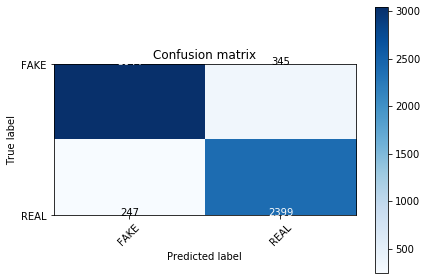

In [34]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [36]:
y_train.shape

(12250,)

In [41]:
# PassiveAggressiveClassifier Algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(50)

accuracy:   0.921
Confusion matrix, without normalization


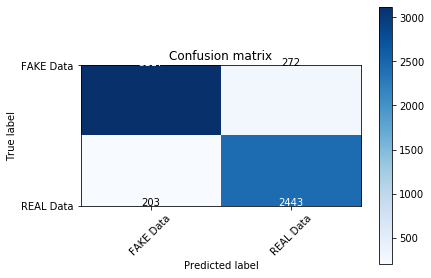

In [42]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [43]:
# Multinomial Classifier with Hyperparameter

In [44]:
classifier=MultinomialNB(alpha=0.1)

In [45]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [46]:
## Get Features names
feature_names = cv.get_feature_names()

In [47]:

classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [48]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [49]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596

# TFIDF vectorizer

In [50]:
# import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf_v=TfidfVectorizer(max_features=5000, ngram_range=range(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [53]:
X.shape

(18285, 5000)

In [54]:

y=messages['label']

In [55]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [56]:

tfidf_v.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'academ',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'accid']

In [57]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': range(1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [58]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8606462303231152
Alpha: 0.1, Score : 0.8737365368682685
Alpha: 0.2, Score : 0.8752278376139188
Alpha: 0.30000000000000004, Score : 0.8760563380281691
Alpha: 0.4, Score : 0.8762220381110191
Alpha: 0.5, Score : 0.8767191383595692
Alpha: 0.6000000000000001, Score : 0.8772162386081193
Alpha: 0.7000000000000001, Score : 0.8772162386081193
Alpha: 0.8, Score : 0.8773819386909694
Alpha: 0.9, Score : 0.8773819386909694


In [60]:
## Get Features names
feature_names = cv.get_feature_names()

In [61]:
classifier.coef_[0]

array([-8.79832171, -8.49831518, -8.85793626, ..., -9.90057091,
       -8.39232849, -9.10091564])

In [62]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.953490562437881, 'hillari elect'),
 (-4.99076373185156, 'trump administr'),
 (-5.093337588256096, 'clinton trump'),
 (-5.4218458104922735, 'elect paul craig'),
 (-5.729413961655055, 'violent'),
 (-5.7834508137669856, 'conceal'),
 (-5.795255403643589, 'warm'),
 (-5.8242603096650445, 'util commiss one'),
 (-5.870292517291487, 'hillari forc new'),
 (-5.8758401773691515, 'fbi reopen hillari'),
 (-5.932463342743819, 'voter fraud'),
 (-5.951675828473915, 'world war'),
 (-6.037070127179886, 'embassi'),
 (-6.138232661185052, 'nyt'),
 (-6.145169809432988, 'america great'),
 (-6.169740290462064, 'russian border'),
 (-6.229683437706903, 'american concern'),
 (-6.244300147789643, 'debat new york'),
 (-6.294422576922791, 'dr david duke'),
 (-6.302132967928947, 'british')]